In [31]:
!rsync -r mats@35.193.152.171:/home/mats/collected-metrics/ ./collected-metrics

In [32]:
!ls collected-metrics

2021-02-27__15-09-56__event-times.csv 2021-03-02__20-08-57__event-times.csv
2021-02-27__15-09-56__metrics.csv     2021-03-02__20-08-57__metrics.csv
2021-02-27__15-30-02__event-times.csv 2021-03-02__20-25-33__event-times.csv
2021-02-27__15-30-02__metrics.csv     2021-03-02__20-25-33__metrics.csv
2021-02-27__16-06-32__event-times.csv 2021-03-02__21-48-12__event-times.csv
2021-02-27__16-06-32__metrics.csv     2021-03-02__21-48-12__metrics.csv
2021-02-27__16-47-31__event-times.csv 2021-03-02__22-00-36__event-times.csv
2021-02-27__16-47-31__metrics.csv     2021-03-02__22-00-36__metrics.csv
2021-02-27__16-57-48__event-times.csv 2021-03-02__22-18-33__event-times.csv
2021-02-27__16-57-48__metrics.csv     2021-03-02__22-18-33__metrics.csv
2021-02-27__17-10-15__event-times.csv 2021-03-02__22-53-30__event-times.csv
2021-02-27__17-10-15__metrics.csv     2021-03-02__22-53-30__metrics.csv
2021-02-27__19-10-53__event-times.csv 2021-03-02__23-10-58__event-times.csv
2021-02-27__19-10-53__metrics.csv   

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
experiments = [{
    'benchmark_id': '2021-02-27__15-09-56',
    'numTuples': '10M',
    'bufferSize': '5M',
    'sleepTime': '20ms',
    'segmentSize': '50k',
    'tupleSize': '0.1kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-02-27__16-57-48',
    'numTuples': '10M',
    'bufferSize': '10M',
    'sleepTime': '10ms',
    'segmentSize': '50k',
    'tupleSize': '0.1kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-03-01__22-25-35',
    'numTuples': '10M',
    'bufferSize': '10M',
    'sleepTime': '20ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 2
}, {
    'benchmark_id': '2021-03-01__22-53-53',
    'numTuples': '10M',
    'bufferSize': '10M',
    'sleepTime': '50ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-03-02__12-05-23',
    'numTuples': '10M',
    'bufferSize': '10M',
    'sleepTime': '75ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-03-02__15-21-11',
    'numTuples': '10M',
    'bufferSize': '10M',
    'sleepTime': '150ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-03-02__16-09-42',
    'numTuples': '3M',
    'bufferSize': '10M',
    'sleepTime': '100ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-03-02__16-51-02',
    'numTuples': '3M',
    'bufferSize': '10M',
    'sleepTime': '80ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-03-02__18-54-02',
    'numTuples': '4M',
    'bufferSize': '10M',
    'sleepTime': '80ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-03-02__19-15-38',
    'numTuples': '4M',
    'bufferSize': '10M',
    'sleepTime': '75ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-03-02__19-36-34',
    'numTuples': '4M',
    'bufferSize': '10M',
    'sleepTime': '45ms',
    'segmentSize': '50k',
    'tupleSize': '0.15kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-03-02__19-59-52',
    'numTuples': '4M',
    'bufferSize': '10M',
    'sleepTime': '40ms',
    'segmentSize': '50k',
    'tupleSize': '0.15kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-03-02__20-08-57',
    'numTuples': '4M',
    'bufferSize': '10M',
    'sleepTime': '50ms',
    'segmentSize': '50k',
    'tupleSize': '0.15kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-03-02__20-25-33',
    'numTuples': '4M',
    'bufferSize': '10M',
    'sleepTime': '85ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-03-02__22-53-30',
    'numTuples': '4M',
    'bufferSize': '10M',
    'sleepTime': '70ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 2
}, {
    'benchmark_id': '2021-03-02__23-10-58',
    'numTuples': '4M',
    'bufferSize': '10M',
    'sleepTime': '70ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 4
}, {
    'benchmark_id': '2021-03-02__23-43-37',
    'numTuples': '2M',
    'bufferSize': '10M',
    'sleepTime': '80ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 4
}, {
    'benchmark_id': '2021-03-03__00-16-08',
    'numTuples': '4M',
    'bufferSize': '10M',
    'sleepTime': '90ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 4
}, {
    'benchmark_id': '2021-03-03__00-51-18',
    'numTuples': '10M',
    'bufferSize': '10M',
    'sleepTime': '20ms',
    'segmentSize': '50k',
    'tupleSize': '0.1kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-03-03__01-18-34',
    'numTuples': '10M',
    'bufferSize': '10M',
    'sleepTime': '30ms',
    'segmentSize': '50k',
    'tupleSize': '0.1kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-03-03__01-38-49',
    'numTuples': '5M',
    'bufferSize': '10M',
    'sleepTime': '25ms',
    'segmentSize': '50k',
    'tupleSize': '0.1kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-03-03__09-24-03',
    'numTuples': '5M',
    'bufferSize': '10M',
    'sleepTime': '20ms',
    'segmentSize': '50k',
    'tupleSize': '0.1kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-02-27__17-10-15',
    'numTuples': '10M',
    'bufferSize': '10M',
    'sleepTime': '15ms',
    'segmentSize': '50k',
    'tupleSize': '0.1kB',
    'parallelism': 1
}, {
    'benchmark_id': '2021-03-10__11-11-22',
    'numTuples': '4M',
    'bufferSize': '10M',
    'sleepTime': '70ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 4
}, {
    'benchmark_id': '2021-03-10__11-39-15',
    'numTuples': '8M',
    'bufferSize': '10M',
    'sleepTime': '60ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 4
}, {
    'benchmark_id': '2021-03-10__11-58-16',
    'numTuples': '8M',
    'bufferSize': '10M',
    'sleepTime': '40ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 4
}, {
    'benchmark_id': '2021-03-10__12-08-20',
    'numTuples': '8M',
    'bufferSize': '10M',
    'sleepTime': '25ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 4
}, {
    'benchmark_id': '2021-03-10__12-18-22',
    'numTuples': '8M',
    'bufferSize': '10M',
    'sleepTime': '10ms',
    'segmentSize': '50k',
    'tupleSize': '0.25kB',
    'parallelism': 4
}]

experiments_df = pd.DataFrame(experiments)
experiments_df

,benchmark_id,numTuples,bufferSize,sleepTime,segmentSize,tupleSize,parallelism
0,2021-02-27__15-09-56,10M,5M,20ms,50k,0.1kB,1
1,2021-02-27__16-57-48,10M,10M,10ms,50k,0.1kB,1
2,2021-03-01__22-25-35,10M,10M,20ms,50k,0.25kB,2
3,2021-03-01__22-53-53,10M,10M,50ms,50k,0.25kB,1
4,2021-03-02__12-05-23,10M,10M,75ms,50k,0.25kB,1
5,2021-03-02__15-21-11,10M,10M,150ms,50k,0.25kB,1
6,2021-03-02__16-09-42,3M,10M,100ms,50k,0.25kB,1
7,2021-03-02__16-51-02,3M,10M,80ms,50k,0.25kB,1
8,2021-03-02__18-54-02,4M,10M,80ms,50k,0.25kB,1
9,2021-03-02__19-15-38,4M,10M,75ms,50k,0.25kB,1


In [5]:
benchmark_id = experiments_df['benchmark_id'][len(experiments_df) - 1]
benchmark_id

'2021-03-10__10-40-05'

In [10]:
def prepare_event_times_df(benchmark_id):
    metrics_df = pd.read_csv(f'collected-metrics/{benchmark_id}__metrics.csv')
    event_times_df = pd.read_csv(f'collected-metrics/{benchmark_id}__event-times.csv')
    print(f'Received {len(event_times_df)} tuples in {len(metrics_df)} segments')
    
    event_times_df['timeSinceStartS'] = (event_times_df['eventTime'] - min(event_times_df['eventTime'])) / 1000
    event_times_df['transferDurationMs'] = event_times_df['flinkSinkTime'] - event_times_df['eventTime']
    
    # Assign segmentPushTime
    for index, row in metrics_df.iterrows():
        segment_start_time = row['segmentStartTime']
        segment_end_time = row['segmentEndTime']
        segment_push_time = row['segmentPushTime']

        cond = (event_times_df['eventTime'] >= segment_start_time) & (event_times_df['eventTime'] <= segment_end_time)
        event_times_df.loc[cond, 'segmentPushTime'] = segment_push_time
        
    # Calculate event time latency
    event_times_df['event_time_latency_in_s'] = (event_times_df['segmentPushTime'] - event_times_df['eventTime']) / 1000
    
    # Calculate throughput
    overall_duration = (metrics_df['segmentPushTime'].max() - event_times_df['flinkSinkTime'].min()) / 1000
    troughput = len(event_times_df) / overall_duration
    event_times_df['Throughput (tps)'] = round(troughput, 2)
    print(f'Throughput for {benchmark_id} was {troughput}')
    
    return event_times_df

Received 10000000 tuples in 200 segments
Throughput for 2021-03-03__01-38-49 was 33369.59495985638


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


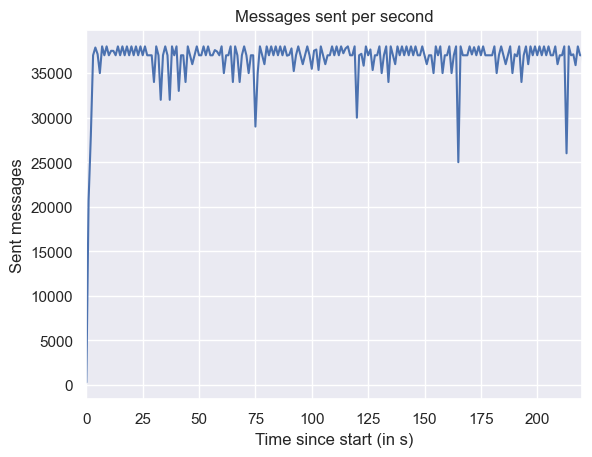

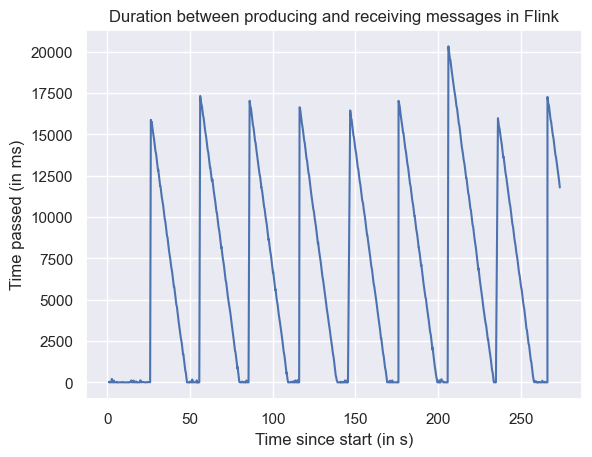

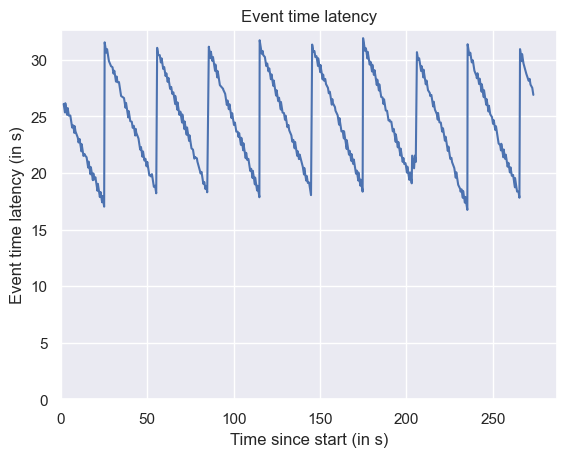

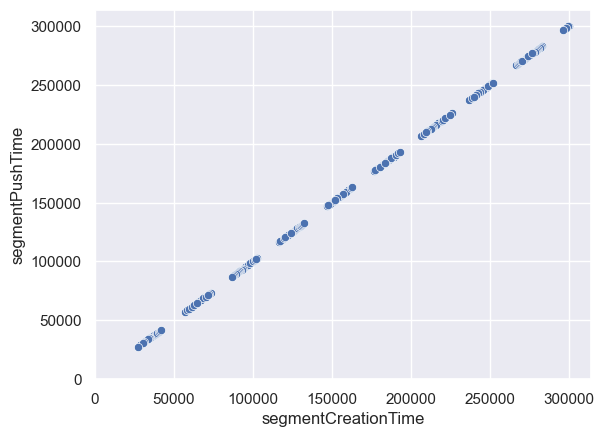

In [299]:
def evaluate_single(benchmark_id: str):
    df = prepare_event_times_df(benchmark_id=benchmark_id)
    
    data = df['timeSinceStartS'].apply(lambda x: round(x)).value_counts()
    ax = sns.lineplot(data.index, data)
    ax.set_title('Messages sent per second')
    ax.set_xlabel('Time since start (in s)')
    ax.set(xlim=(0, 220))
    ax.set_ylabel('Sent messages')
    plt.show()
    
    ax = sns.lineplot(data=df.sample(1000), x='timeSinceStartS', y='transferDurationMs')
    ax.set_title('Duration between producing and receiving messages in Flink')
    ax.set_xlabel('Time since start (in s)')
    ax.set_ylabel('Time passed (in ms)')
    plt.show()
    
    ax = sns.lineplot(data=df.sample(1000), x='timeSinceStartS', y='event_time_latency_in_s')
    ax.set_title('Event time latency')
    ax.set_xlabel('Time since start (in s)')
    ax.set_ylabel('Event time latency (in s)')
    ax.set(xlim=(0, None))
    ax.set(ylim=(0, None))
    plt.show()
    
    
    metrics_df = pd.read_csv(f'collected-metrics/{benchmark_id}__metrics.csv')
    event_time_min = min(df['eventTime'])
    metrics_df['segmentCreationTime'] = metrics_df['segmentCreationTime'] - event_time_min
    metrics_df['segmentPushTime'] = metrics_df['segmentPushTime'] - event_time_min
    ax = sns.scatterplot(data=metrics_df, x='segmentCreationTime', y='segmentPushTime')
    ax.set_xlabel('segmentCreationTime')
    ax.set_ylabel('segmentPushTime')
    ax.set(xlim=(0, None))
    ax.set(ylim=(0, None))
    plt.show()

evaluate_single('2021-03-03__01-38-49')

In [34]:
msg_size100_sleep30_p1 = '2021-03-03__01-18-34'
msg_size100_sleep25_p1 = '2021-03-03__01-38-49'
msg_size100_sleep20_p1 = '2021-03-03__09-24-03'

msg_size150_sleep50_p1 = '2021-03-02__20-08-57'
msg_size250_sleep85_p1 = '2021-03-02__20-25-33'

# msg_size250_sleep90_p4 = '2021-03-10__11-39-15'
msg_size250_sleep25_p4 = '2021-03-10__12-08-20'
msg_size250_sleep10_p4 = '2021-03-10__12-18-22'

,benchmark_id,numTuples,bufferSize,sleepTime,segmentSize,tupleSize,parallelism
19,2021-03-03__01-18-34,10M,10M,30ms,50k,0.1kB,1
20,2021-03-03__01-38-49,5M,10M,25ms,50k,0.1kB,1
21,2021-03-03__09-24-03,5M,10M,20ms,50k,0.1kB,1


Received 10000000 tuples in 200 segments
Throughput for 2021-03-03__01-18-34 was 29742.872864089946
Received 10000000 tuples in 200 segments
Throughput for 2021-03-03__01-38-49 was 33369.59495985638
Received 6000000 tuples in 120 segments
Throughput for 2021-03-03__09-24-03 was 34455.82762897965


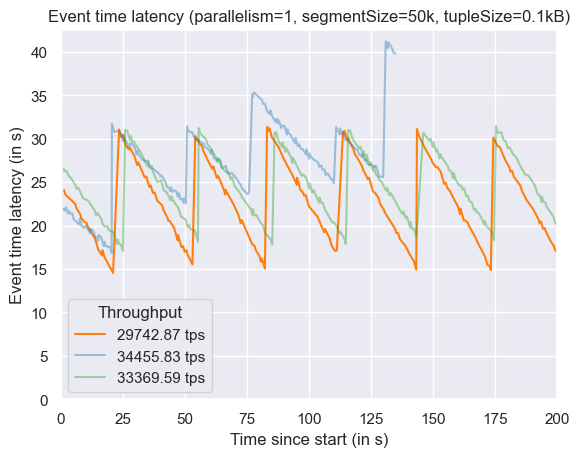

In [317]:
def throughput_benchmark(benchmark_ids):
    blue = (0.122, 0.467, 0.706, 0.4) # tab:blue
    orange = (1, 0.498, 0.055, 1) # tab:orange
    green = (0.173, 0.627, 0.173, 0.4) # tab:green
    colors = [orange, blue, green]

    selected_experiments_df = experiments_df[experiments_df['benchmark_id'].isin(benchmark_ids)]
    display(selected_experiments_df)

    dfs = [prepare_event_times_df(benchmark_id) for benchmark_id in benchmark_ids]
    
    for i in range(len(selected_experiments_df)):
        msg_size = selected_experiments_df['tupleSize'].to_numpy()[i]
        throughput = float(dfs[i]['Throughput (tps)'].unique()[0])
        mbps = round(float(msg_size[:-2]) * throughput / 1000, 2)
        dfs[i]['Throughput'] = f"{throughput} tps"
        
    all_data = pd.concat(dfs, copy=False)
    all_data.head()

    ax = sns.lineplot(data=all_data.sample(1000), x='timeSinceStartS', y='event_time_latency_in_s', hue='Throughput', palette=colors[:len(benchmark_ids)])
    ax.set_title('Event time latency (parallelism=1, segmentSize=50k, tupleSize=0.1kB)')
    ax.set_xlabel('Time since start (in s)')
    ax.set_ylabel('Event time latency (in s)')
    ax.set(xlim=(0, 200))
    ax.set(ylim=(0, None))

    plt.savefig("event-time-latency_raw-throughput.png")
    plt.show()

throughput_benchmark(benchmark_ids=[msg_size100_sleep30_p1, msg_size100_sleep25_p1, msg_size100_sleep20_p1])


,benchmark_id,numTuples,bufferSize,sleepTime,segmentSize,tupleSize,parallelism
20,2021-03-03__01-38-49,10M,10M,25ms,50k,0.1kB,1
12,2021-03-02__20-08-57,4M,10M,50ms,50k,0.15kB,1
13,2021-03-02__20-25-33,4M,10M,85ms,50k,0.25kB,1


Received 10000000 tuples in 200 segments
Throughput for 2021-03-03__01-38-49 was 33369.59495985638
Received 4000000 tuples in 80 segments
Throughput for 2021-03-02__20-08-57 was 16354.968230474211
Received 4000000 tuples in 80 segments
Throughput for 2021-03-02__20-25-33 was 10117.463754186101


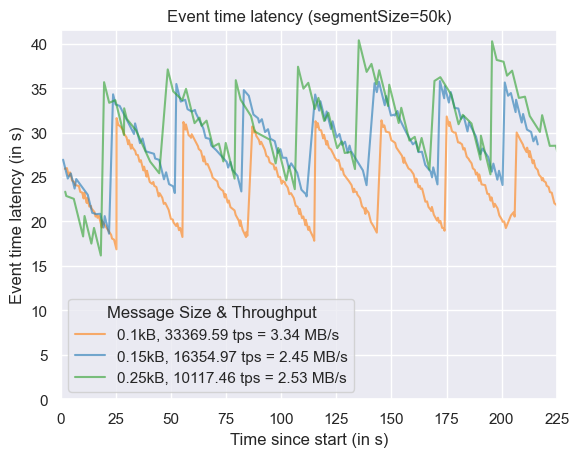

In [301]:
def message_size_benchmark(benchmark_ids):
    blue = (0.122, 0.467, 0.706, 0.6) # tab:blue
    orange = (1, 0.498, 0.055, 0.6) # tab:orange
    green = (0.173, 0.627, 0.173, 0.6) # tab:green
    colors = [orange, blue, green]

    selected_experiments_df = pd.concat([experiments_df[experiments_df['benchmark_id'] == benchmark_id] for benchmark_id in benchmark_ids])
    display(selected_experiments_df)

    dfs = [prepare_event_times_df(benchmark_id) for benchmark_id in benchmark_ids]
    
    for i in range(len(selected_experiments_df)):
        msg_size = selected_experiments_df['tupleSize'].to_numpy()[i]
        throughput = float(dfs[i]['Throughput (tps)'].unique()[0])
        mbps = round(float(msg_size[:-2]) * throughput / 1000, 2)
        dfs[i]['Message Size & Throughput'] = f"{msg_size}, {throughput} tps = {mbps} MB/s"
    
    all_data = pd.concat(dfs, copy=False)
    all_data.head()

    ax = sns.lineplot(data=all_data.sample(1000), x='timeSinceStartS', y='event_time_latency_in_s', hue='Message Size & Throughput', palette=colors[:len(benchmark_ids)])
    ax.set_title('Event time latency (segmentSize=50k)')
    ax.set_xlabel('Time since start (in s)')
    ax.set_ylabel('Event time latency (in s)')
    ax.set(xlim=(0, 225))
    ax.set(ylim=(0, None))

    plt.savefig("event-time-latency_message-size.png")
    plt.show()
    
message_size_benchmark(benchmark_ids=[msg_size100_sleep25_p1, msg_size150_sleep50_p1, msg_size250_sleep85_p1])


,benchmark_id,numTuples,bufferSize,sleepTime,segmentSize,tupleSize,parallelism
13,2021-03-02__20-25-33,4M,10M,85ms,50k,0.25kB,1
26,2021-03-10__12-08-20,8M,10M,25ms,50k,0.25kB,4
27,2021-03-10__12-18-22,8M,10M,10ms,50k,0.25kB,4


Received 4000000 tuples in 80 segments
Throughput for 2021-03-02__20-25-33 was 10117.463754186101
Received 8000000 tuples in 160 segments
Throughput for 2021-03-10__12-08-20 was 33477.98613174425
Received 8000000 tuples in 160 segments
Throughput for 2021-03-10__12-18-22 was 47607.99576288838


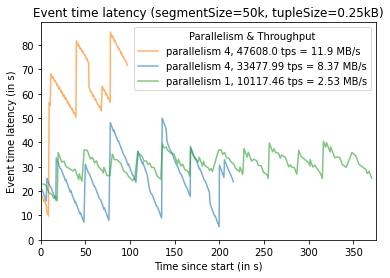

In [35]:
def parallelism_benchmark(benchmark_ids):
    blue = (0.122, 0.467, 0.706, 0.6) # tab:blue
    orange = (1, 0.498, 0.055, 0.6) # tab:orange
    green = (0.173, 0.627, 0.173, 0.6) # tab:green
    colors = [orange, blue, green]
    
    selected_experiments_df = pd.concat([experiments_df[experiments_df['benchmark_id'] == benchmark_id] for benchmark_id in benchmark_ids])
    display(selected_experiments_df)

    dfs = [prepare_event_times_df(benchmark_id) for benchmark_id in benchmark_ids]
    
    for i in range(len(selected_experiments_df)):
        parallelism = selected_experiments_df['parallelism'].to_numpy()[i]
        throughput = dfs[i]['Throughput (tps)'].unique()[0]
        mbps = round(0.25 * throughput / 1000, 2)
        dfs[i]['Parallelism & Throughput'] = f"parallelism {parallelism}, {throughput} tps = {mbps} MB/s"
    
    all_data = pd.concat(dfs, copy=False)
    all_data.head()

    ax = sns.lineplot(data=all_data.sample(1000), x='timeSinceStartS', y='event_time_latency_in_s', hue='Parallelism & Throughput', palette=colors[:len(benchmark_ids)])
    ax.set_title('Event time latency (segmentSize=50k, tupleSize=0.25kB)')
    ax.set_xlabel('Time since start (in s)')
    ax.set_ylabel('Event time latency (in s)')
    ax.set(xlim=(0, 375))
    ax.set(ylim=(0, None))

    plt.savefig("event-time-latency_parallelism.png")
    plt.show()
    
parallelism_benchmark(benchmark_ids=[msg_size250_sleep85_p1, msg_size250_sleep25_p4, msg_size250_sleep10_p4])
